In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/h.png')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
cv2.imwrite("/content/photo_2022-10-20_15-37-39.jpg", dst)

error: ignored

In [ ]:
img = cv2.imread('/content/photo_2022-10-20_15-37-39.jpg')
#output_med = cv2.medianBlur(img, 5)
output_med=cv2.bilateralFilter(img, 5, 6, 6)
cv2_imshow(output_med)

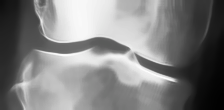

In [ ]:
img = cv2.imread('/content/hd.png')
#output_med = cv2.medianBlur(img, 5)
output_med=cv2.bilateralFilter(img, 5, 6, 6)
cv2_imshow(output_med)

**gamma**

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

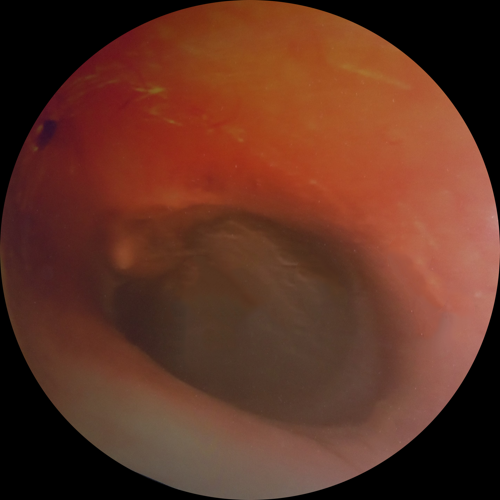

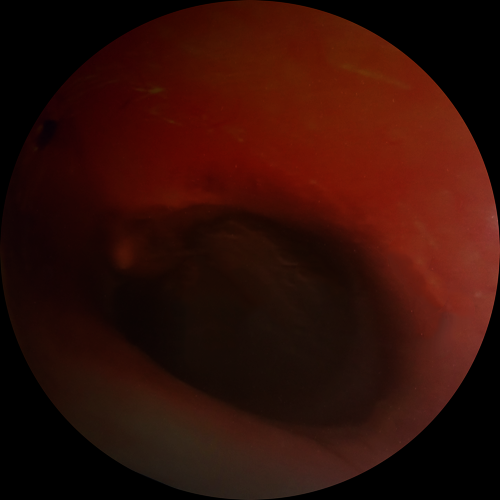

In [4]:
image = cv2.imread('/content/n1 rrf.png')
img= np.array(255*(image / 255) ** 2.0, dtype = 'uint8')
cv2_imshow(image)
cv2_imshow(img)
#cv2.imwrite("g.png", img)

**Histogram Equalization**

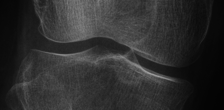

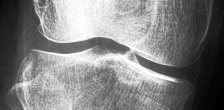

In [ ]:
segmented_image = cv2.imread('/content/g.png',0) 
equ_image = cv2.equalizeHist(segmented_image)
cv2_imshow(segmented_image)
cv2_imshow(equ_image)
#cv2.imwrite("h.png", equ_image)

**Contrast limited adaptive histogram equalization (CLAHE)**

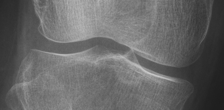

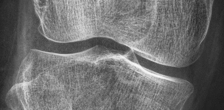

True

In [ ]:
import cv2
import numpy as np
read_img = cv2.imread('/content/1 (1).png')
g = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)  
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(g)
cv2_imshow(read_img)
cv2_imshow(cl)
cv2.imwrite("cl.png", cl)

**Edge Detection**

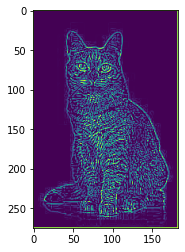

In [ ]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
image = Image.open(r"/content/drive/MyDrive/DML/lab 3/download.jpg")
image = image.convert("L")
image = image.filter(ImageFilter.FIND_EDGES)
plt.imshow(image)
plt.show()

**Morphological opening **

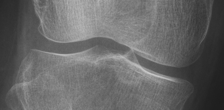

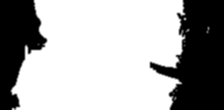

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2 
from scipy import fftpack
from PIL import Image,ImageEnhance
import scipy.fftpack
from skimage import data, io
from scipy.signal import convolve2d as conv2

from matplotlib import pyplot as plt

image = cv2.imread('/content/1 (1).png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)


cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 50:
        cv2.drawContours(opening, [c], -1, 0, -1)


result = 255 - opening
result = cv2.GaussianBlur(result, (3,3), 0)
cv2_imshow(image)
cv2_imshow(result)


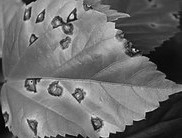

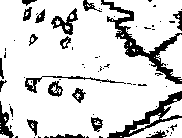

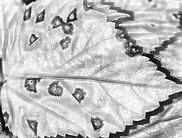

In [ ]:
import cv2

image = cv2.imread('/content/drive/MyDrive/DML/lab 3/leaf.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(image, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
cv2_imshow(image)
cv2_imshow(out_binary)  
cv2_imshow(out_gray)  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


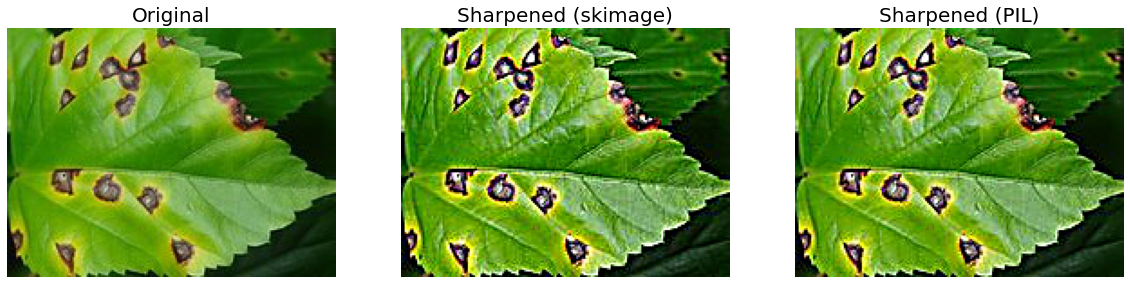

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image, ImageFilter
from skimage.io import imread
from skimage.filters import unsharp_mask
im = imread('/content/drive/MyDrive/DML/lab 3/leaf.png')
im1 = np.copy(im).astype(np.float)
for i in range(3):
    im1[...,i] = unsharp_mask(im[...,i], radius=2, amount=2)
im = Image.open('/content/drive/MyDrive/DML/lab 3/leaf.png')
im2 = im.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.figure(figsize=(20,7))
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(132), plt.imshow(im1), plt.axis('off'), plt.title('Sharpened (skimage)', size=20)
plt.subplot(133), plt.imshow(im2), plt.axis('off'), plt.title('Sharpened (PIL)', size=20)
plt.show()